In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# statistical models 
import statsmodels.api as sm

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# model opitmization
from sklearn.model_selection import GridSearchCV


# time - test
import time

# math 
from math import sqrt

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [3]:
df_hr.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
0,6108,1,2.0,-0.103865,0.0,-0.503161,0,0,-0.12,0,...,0,0,0,0,0,0,1,0,1,0
1,785,1,1.0,-0.677333,-2.0,-0.225465,0,0,1.04,0,...,0,0,0,0,0,0,1,0,1,0
2,1234,2,0.0,-0.321705,1.0,-0.864038,1,0,-0.44,0,...,0,0,0,0,0,0,1,0,1,0
3,6108,1,0.0,-0.436134,1.0,-0.864038,0,0,-0.08,0,...,0,0,1,0,0,0,1,1,0,0
4,1701,2,0.0,0.732668,-2.0,0.740418,0,0,-0.20,0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [5]:
df_hr.describe()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,4584.995381,1.290805,0.231522,0.107887,0.583150,-0.043580,0.512868,0.064452,0.283836,0.500000,...,0.015178,0.140013,0.044435,0.036846,0.017268,0.315662,0.684338,0.429059,0.545535,0.025407
std,4079.802512,0.483942,0.559087,0.671022,1.182599,0.699312,0.499862,0.245570,0.579979,0.500027,...,0.122268,0.347020,0.206070,0.188393,0.130275,0.464805,0.464805,0.494969,0.497950,0.157366
min,31.000000,0.000000,0.000000,-1.690290,-2.000000,-1.378193,0.000000,0.000000,-0.760000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,1.000000,0.000000,-0.436134,0.000000,-0.503161,0.000000,0.000000,-0.240000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2617.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.160000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6108.000000,2.000000,0.000000,0.476189,2.000000,0.496839,1.000000,0.000000,0.810000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11497.000000,2.000000,7.000000,2.017907,2.000000,2.115994,1.000000,1.000000,1.560000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_hr.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Sales & Marketing    0
department_Operations           0
department_Technology           0
department_Analytics            0
department_R&D                  0
department_Procurement          0
department_Finance              0
department_HR                   0
department_Legal                0
gender_f                        0
gender_m                        0
recruitment_channel_sourcing    0
recruitment_channel_other       0
recruitment_channel_referred    0
dtype: int64

In [7]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

### 1.1.1 Train and Test Split

In [8]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.2 Build the Model(s)

- building baseline models, then 2 models will be chosen to focus on 

In [10]:
models = []

model_names = []

### Logisitic Regression

In [11]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier 

In [12]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

### Random Forest Classifier 

In [13]:
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

### Support Vector Classifier 

In [14]:
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

### MLP Classifier 

In [15]:
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

### ADA Boost 

In [16]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

### XG Boost 

In [17]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.3 Evaluate and Improve the Model(s)

In [18]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    print('\nTest Report:')
    print(classification_report(y_test, test_pred))
    
    cm = confusion_matrix(y_test, test_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')
    plt.show()

### 1.3.1 Consolidated View of Baseline Model Accuracies 

In [19]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

# we just see how models perform differently 

,Model,Train Score,Test Score
0,Logistic Regression,0.728787,0.720674
1,Decision Tree,1.000000,0.749267
2,Random Forest,1.000000,0.793622
3,SVC,0.533941,0.537023
4,Multi Layer Perceptron,0.663891,0.668622
5,ADA,0.782055,0.769428
6,XGB,0.933532,0.799487


### 1.3.2 Choosing Models 
These models will be chosen for further evaluation : <mark>Logistic Regression (Simple Model)</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

### 1.3.2.1 Statistical Models 
- use statistical models to evaluate coeffients and understanding relationships between features 

In [20]:
# using logit
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429350
         Iterations 7


In [21]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                           20
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                  0.3806
Time:                        16:25:05   Log-Likelihood:                -2732.4
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                        6.851e-06   8.88e-06      0.772      0.440   -1.06e-05    2.43e-05
education                        0.1445      0.079      1.818      0.069      -0.011       0.300
no_of_trainings                 -0.0403      0.062     -0.655      0.513      -0.161       0.080
age                             -0.3805      0.073     -5.199      0.000      -0.524      -0.237
previous_year_rating             0.2490      0.031      8.137      0.000       0.189       0.309
length_of_service                0.1946      0.063      3.086      0.002       0.071       0.318
KPIs_met >80%                    2.6255      0.084     31.276      0.000       2.461       2.790
awards_won?                      1.9333      0.210      9.198      0.000       1.521       2.345
avg_training_score               7.2899      0.233     31.287      0.000       6.833       7.747
department_Sales & Marketing     4.2095        nan        nan        nan         nan         nan
department_Operations            1.3355        nan        nan        nan         nan         nan
department_Technology           -3.8352        nan        nan        nan         nan         nan
department_Analytics            -5.3134        nan        nan        nan         nan         nan
department_R&D                  -5.6380        nan        nan        nan         nan         nan
department_Procurement          -1.3390        nan        nan        nan         nan         nan
department_Finance               1.3003        nan        nan        nan         nan         nan
department_HR                    3.7919        nan        nan        nan         nan         nan
department_Legal                 1.0080        nan        nan        nan         nan         nan
gender_f                        -2.2522    1.2e+06  -1.87e-06      1.000   -2.36e+06    2.36e+06
gender_m                        -2.2282    1.2e+06  -1.85e-06      1.000   -2.36e+06    2.36e+06
recruitment_channel_sourcing    -1.5920        nan        nan        nan         nan         nan
recruitment_channel_other       -1.4742        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.4141        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.3.3 Evaluate Chosen Models

### Logistic Regression 

Model: LogisticRegression(random_state=42)

Training score: 0.728786926461345
Testing score: 0.7206744868035191

Test Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1389
           1       0.71      0.74      0.72      1339

    accuracy                           0.72      2728
   macro avg       0.72      0.72      0.72      2728
weighted avg       0.72      0.72      0.72      2728



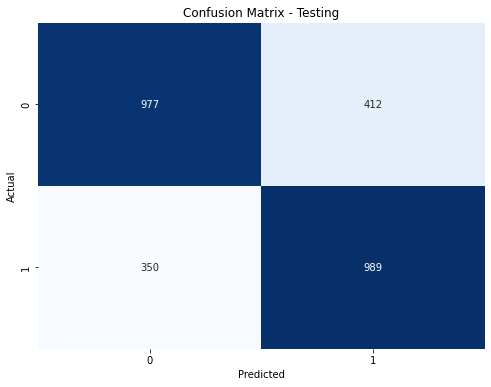

In [22]:
model_scores_classification(lg)

# both train and tests do not have significant differences - it is neither overfitting nor underfitting
# model accuracy can still be improved 

### Multilayer Perceptron 

Model: MLPClassifier(random_state=42)

Training score: 0.6638906348208674
Testing score: 0.6686217008797654

Test Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      1389
           1       0.75      0.49      0.59      1339

    accuracy                           0.67      2728
   macro avg       0.69      0.67      0.66      2728
weighted avg       0.69      0.67      0.66      2728



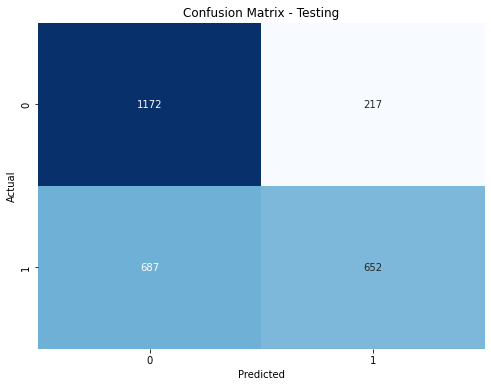

In [23]:
model_scores_classification(mlp)

# model accuracy can be improved
# not much difference between train and test - neither overfitting or underfit 

### ADA Boost 
- currently no base estimators added into the boosting model

Model: AdaBoostClassifier(random_state=42)

Training score: 0.7820553111250785
Testing score: 0.7694281524926686

Test Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1389
           1       0.75      0.79      0.77      1339

    accuracy                           0.77      2728
   macro avg       0.77      0.77      0.77      2728
weighted avg       0.77      0.77      0.77      2728



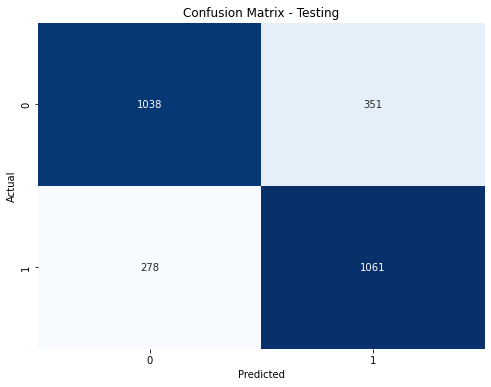

In [24]:
model_scores_classification(ada)

# higher scores than the other models 
# base estimators (the previous models can be added)
# # might be lightly overfitted, there is higher bias against the variance  

### 1.3.4 Model Improvements 

### Logistic Regression 
Hyperparameters that can be tweaked : 
- <mark>C</mark>  : regularisation parameter, higher C may lead to overfiting and lower C may lead to underfitting 
- <mark>penalty</mark> : regularisation term to prevent overfitting 
- <mark>solver</mark> : choice of solver 
- <mark>max_iter</mark> : number of iterations for the solver to converge, low iterations can lead to underfit

### C vs. accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

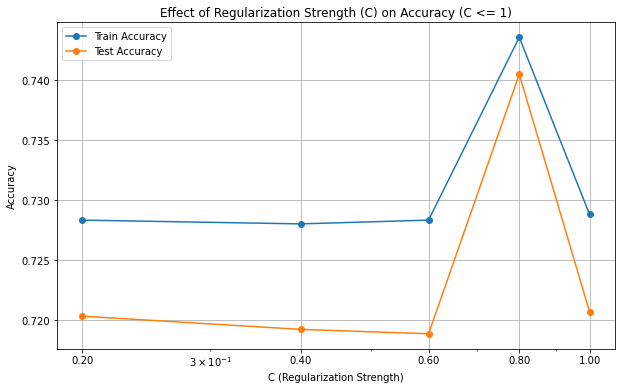

Highest Train Accuracy: 0.744 at C = 0.8
Highest Test Accuracy: 0.740 at C = 0.8


In [25]:
# Assuming you have X_train, X_test, y_train, and y_test
# Replace these with your actual training and testing data

# Define a range of values for C
C_values = [0.2, 0.4, 0.6, 0.8, 1]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of C
for C_val in C_values:
    # Train a logistic regression model
    lg = LogisticRegression(C=C_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.semilogx(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Regularization Strength (C) on Accuracy (C <= 1)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.xticks(C_values, [f"{val:.2f}" for val in C_values])  # Set x-axis ticks to actual values
plt.legend()
plt.grid(True)
plt.show()

# Find the index of the maximum train accuracy
max_train_accuracy_index = train_accuracies.index(max(train_accuracies))
# Find the corresponding C value for the maximum train accuracy
max_train_accuracy_C = C_values[max_train_accuracy_index]

# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))
# Find the corresponding C value for the maximum test accuracy
max_test_accuracy_C = C_values[max_test_accuracy_index]

# Print the results
print(f'Highest Train Accuracy: {max(train_accuracies):.3f} at C = {max_train_accuracy_C}')
print(f'Highest Test Accuracy: {max(test_accuracies):.3f} at C = {max_test_accuracy_C}')

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

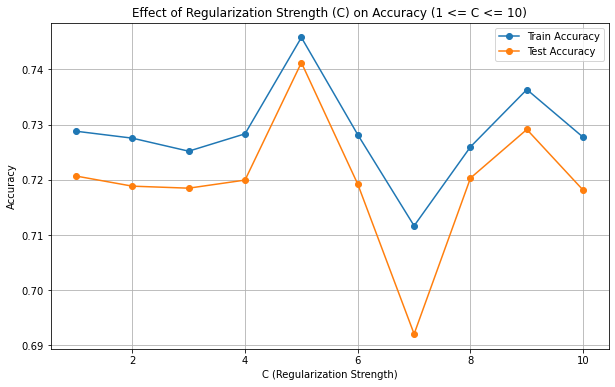

Highest Train Accuracy: 0.746 at C = 5
Highest Test Accuracy: 0.741 at C = 5


In [26]:
# Define a range of values for C from 1 to 10
C_values = list(range(1, 11))

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of C
for C_val in C_values:
    # Train a logistic regression model
    lg = LogisticRegression(C=C_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Regularization Strength (C) on Accuracy (1 <= C <= 10)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the index of the maximum train accuracy
max_train_accuracy_index = train_accuracies.index(max(train_accuracies))
# Find the corresponding C value for the maximum train accuracy
max_train_accuracy_C = C_values[max_train_accuracy_index]

# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))
# Find the corresponding C value for the maximum test accuracy
max_test_accuracy_C = C_values[max_test_accuracy_index]

# Print the results
print(f'Highest Train Accuracy: {max(train_accuracies):.3f} at C = {max_train_accuracy_C}')
print(f'Highest Test Accuracy: {max(test_accuracies):.3f} at C = {max_test_accuracy_C}')


### max_iter vs. accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

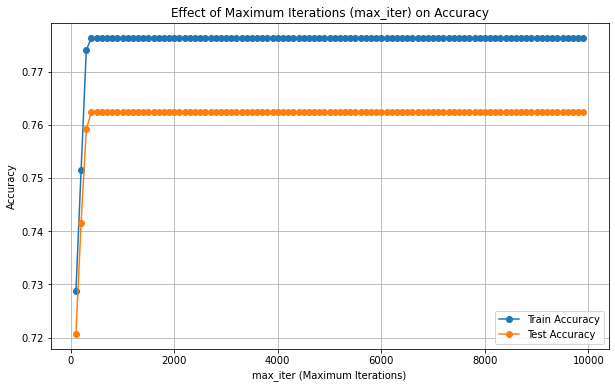

In [27]:
# Define a range of values for max_iter
max_iter_values = np.arange(100, 10000, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of max_iter
for max_iter_val in max_iter_values:
    # Train a logistic regression model
    lg = LogisticRegression(max_iter=max_iter_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_iter_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Maximum Iterations (max_iter) on Accuracy')
plt.xlabel('max_iter (Maximum Iterations)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# important to note that this is subject to different solvers as well 
# the accuracy tends to plateau after 500 iterations 

### Hyperparameter Tuning using GridSearchCV 
- uses cross validation 
- goes through different combinations of parameters 
- from the seeing how the model performs based on individual parameters, it can be used as a gauge on what to values to input

### 1st iteration 

In [28]:
param_grid = {'penalty' : ['l1','l2','elasticnet'], # type of penalty? 
              'C' : [0.2,0.5,0.8,1], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear','newton-cg','newton-cholesky'], # different solvers 
              'max_iter' : [400,500,600]} # using the range where it was optimal but we want lower 

In [29]:
start_time = time.time()

grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.543 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.5s
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.3s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.548 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.558 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.550 total time=   0.6s
[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.4s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.559 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.570 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.7s
[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.5s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.5s
[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.793 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.3s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.7s
[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.793 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.5s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.8s
[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.793 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.7s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s
[CV 5/5] END C=0.5, max_iter=600, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.5s
[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.4s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.8s
[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.5s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   1.1s
[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.8s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.5s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.4s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.6s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.4s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.9s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.6s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
660 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\

In [30]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7877134931104163
{'C': 0.8, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
Elapsed Time: 02:19


In [31]:
# improved model from GS - lg2 
lg2 = LogisticRegression(C = 0.8,max_iter=400,penalty='l1',solver='liblinear',random_state=42).fit(X_train,y_train)

Model: LogisticRegression(C=0.8, max_iter=400, penalty='l1', random_state=42,
                   solver='liblinear')

Training score: 0.7910119421747329
Testing score: 0.7738269794721407

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1389
           1       0.75      0.81      0.78      1339

    accuracy                           0.77      2728
   macro avg       0.78      0.77      0.77      2728
weighted avg       0.78      0.77      0.77      2728



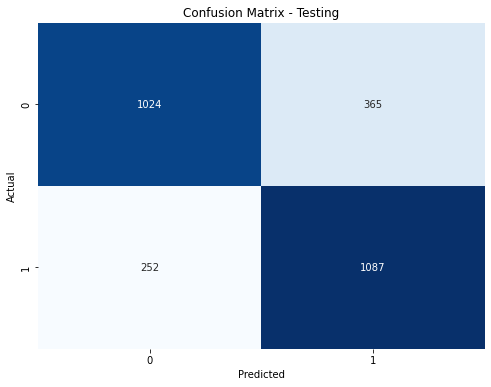

In [32]:
# evaluate 
model_scores_classification(lg2)
# can see that the model score increased but it overfit

### 2nd iteration - higher C range 

In [33]:
param_grid = {'penalty' : ['l1','l2','elasticnet'], # type of penalty? 
              'C' : [1,3,5,7,9], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear','newton-cg','newton-cholesky'], # different solvers 
              'max_iter' : [400,500,600]} # we want to achieve a model that can perform well at lower iterations 

In [34]:
start_time = time.time()

grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.5s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.3s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.6s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.4s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.7s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.8s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.6s
[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.773 total time=   0.3s
[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.2s
[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.3s
[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.562 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.6s
[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.773 total time=   0.2s
[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.2s
[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.5s
[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.1s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.549 total time=   0.9s
[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.773 total time=   0.2s
[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.2s
[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.3s
[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.7s
[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.1s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.6s
[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.5s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.5s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.2s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, pe

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.562 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.6s
[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.5s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.4s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.549 total time=   0.8s
[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.5s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.7s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.2s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, pe

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.5s
[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.760 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.3s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.562 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.6s
[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.2s
[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=lbfgs;, score=0.760 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=lbfgs;, score=0.790 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.5s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.1s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.549 total time=   0.9s
[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.2s
[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.5s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.544 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.554 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.555 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.524 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.7s
[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.554 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.555 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.524 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.591 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.585 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.546 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.564 total time=   0.3s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.774 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.562 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.530 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.6s
[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.562 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.591 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.603 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.596 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.554 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.578 total time=   0.5s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.774 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.561 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.571 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.540 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.549 total time=   0.8s
[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total time=   0.3s
[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.571 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.568 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.540 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.605 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.608 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.606 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.561 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.588 total time=   0.6s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
825 fits failed out of a total of 1350.
The score on th

[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, 

In [35]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.787713493110416
{'C': 3, 'max_iter': 400, 'penalty': 'l2', 'solver': 'newton-cg'}
Elapsed Time: 03:02


In [36]:
lg3 = LogisticRegression(C=7,max_iter=400,penalty='l2',solver='liblinear').fit(X_train,y_train)

Model: LogisticRegression(C=7, max_iter=400, solver='liblinear')

Training score: 0.7913262099308611
Testing score: 0.7741935483870968

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1389
           1       0.75      0.81      0.78      1339

    accuracy                           0.77      2728
   macro avg       0.78      0.77      0.77      2728
weighted avg       0.78      0.77      0.77      2728



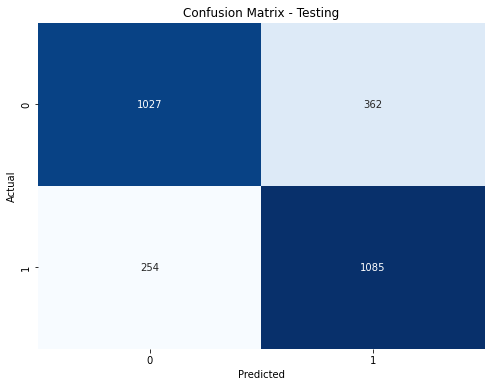

In [37]:
model_scores_classification(lg3)
# similar to model scores but the scores are overfit 

### Multilayer Perceptron
Parameters that can be tweaked: (however, what is the case when some params are specific to another? like solvers, e.g. solver = 'adam, epsilon only applies to that solver?)
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### hidden layer sizes vs. model accuracy (baseline model) 
- sizes that are too small limits the capacity of learning, but too high layers may make the model fit training data too closely 

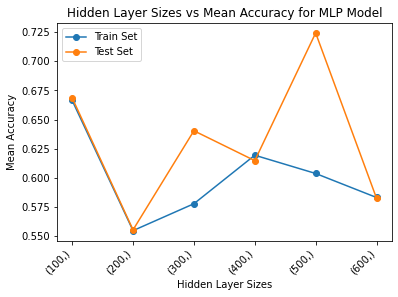

In [38]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### hidden layer sizes vs. model accuracy (baseline model)  - lower number of layers

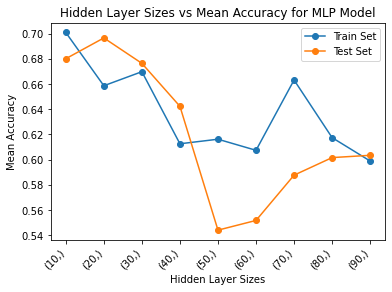

In [39]:
hidden_layer_sizes = [(i,) for i in range(10, 100, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


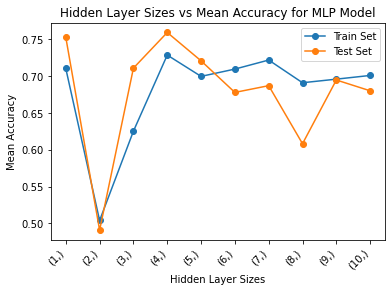

In [40]:
hidden_layer_sizes = [(i,) for i in range(1, 11, 1)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### batch size vs. model accuracies 


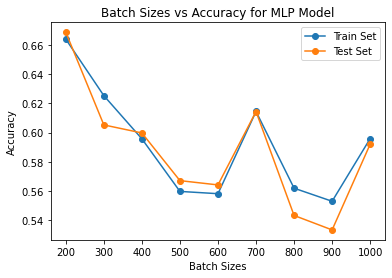

In [41]:
batch_sizes = [200, 300, 400, 500, 600, 700, 800, 900, 1000]

train_accuracies = []
test_accuracies = []

# Train MLP models with different batch sizes
for batch_size in batch_sizes:
    model = MLPClassifier(batch_size=batch_size, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(batch_sizes, train_accuracies, marker='o', label='Train Set')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.title('Batch Sizes vs Accuracy for MLP Model')
plt.legend()
plt.show()

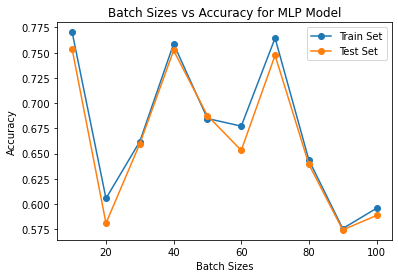

In [78]:
batch_sizes = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different batch sizes
for batch_size in batch_sizes:
    model = MLPClassifier(batch_size=batch_size, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(batch_sizes, train_accuracies, marker='o', label='Train Set')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.title('Batch Sizes vs Accuracy for MLP Model')
plt.legend()
plt.show()

### max_iter vs. model accuracies (higher iterations) 

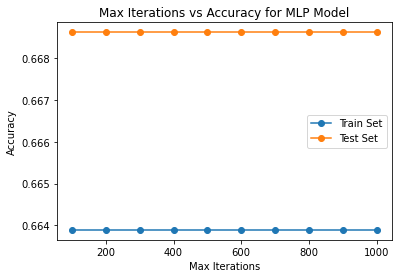

In [42]:
max_iters = [100,200,300,400,500,600,700,800,900,1000]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

### max iter against model accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


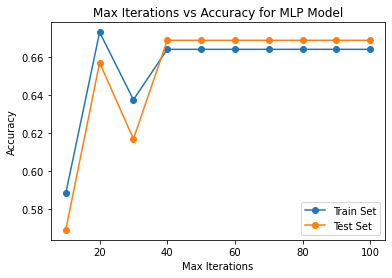

In [43]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

### alpha (regularisation) vs. models accuracies 

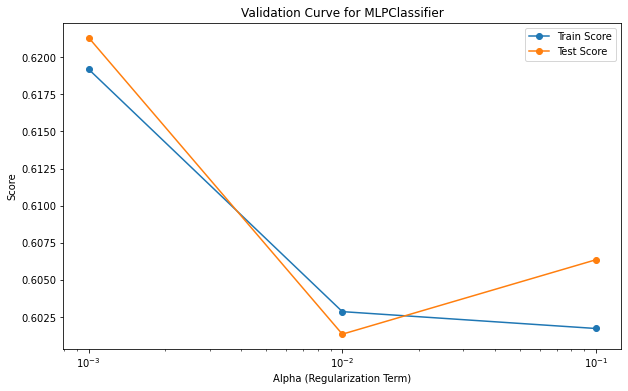

In [44]:
alphas = [0.001, 0.01, 0.1]

train_scores, test_scores = validation_curve(
    mlp, X_train, y_train, param_name="alpha", param_range=alphas, cv=5
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, np.mean(train_scores, axis=1), label="Train Score", marker='o')
plt.plot(alphas, np.mean(test_scores, axis=1), label="Test Score", marker='o')
plt.xscale('log')  # Use this line if you still want the x-axis to be log-scaled
plt.title("Validation Curve for MLPClassifier")
plt.xlabel("Alpha (Regularization Term)")
plt.ylabel("Score")
plt.legend()
plt.show()

### Hyperparameter Tuning using GridSearchCV 

### 1st iteration - lower layer sizes

In [45]:
param_grid = {'hidden_layer_sizes' : [(1,),(4,),(7,),(10,)], # lower layer sizes prevents overfitting as compared to higher sizes
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[30,40,50]} # try a lower set of iterations 

In [46]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.571 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.582 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.551 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.610 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.507 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.520 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.526 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.517 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.ht

[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.598 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.623 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.584 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.607 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.609 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.521 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.508 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.524 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.527 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encounte

[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.536 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.599 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_

[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.627 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.625 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.608 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.629 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.502 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.540 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.562 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.539 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_i

[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.667 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.661 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.689 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.679 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.677 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.642 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.689 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.715 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.627 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.650 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.598 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.699 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.698 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.677 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.684 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.638 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.553 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.673 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.700 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.668 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.728 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.621 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.676 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.640 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.696 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.640 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.684 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.716 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.709 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.728 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.589 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.748 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.684 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.664 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.720 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.682 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.744 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.709 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.728 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.589 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.754 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.668 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.677 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.691 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.637 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.638 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.641 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.678 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.611 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.697 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.641 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.579 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.654 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.697 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.689 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.614 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.619 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), m

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.543 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.535 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.508 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.561 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.631 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.519 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.524 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.665 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.629 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.676 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.650 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.664 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.520 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.518 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.523 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.564 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.505 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.650 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.667 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.657 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.661 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.520 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.517 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.523 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.538 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.732 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.745 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.669 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.754 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.739 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.520 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.496 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.523 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.538 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_it

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.658 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.535 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.510 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.662 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.532 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.529 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.552 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.740 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.674 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.498 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.693 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.590 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.529 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.497 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.755 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.580 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.685 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.636 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.688 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.595 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.496 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.529 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.605 total time=   0.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, s

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 tota

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.504 tota

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.504 tota

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.508 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.505 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.577 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.673 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.596 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.664 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.505 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.505 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.506 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 tota

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.678 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.647 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.692 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.659 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.674 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.505 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.505 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.506 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.680 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.647 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.690 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.691 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.505 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.505 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.506 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 to

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.636 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.624 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.643 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.505 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.661 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.635 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.662 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.646 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.667 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.510 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.505 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.664 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.638 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.653 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.659 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.504 total time=   0.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.514 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.505 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.5

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.510 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.541 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.576 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.531 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.677 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.655 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.647 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.510 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.553 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.668 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.649 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.606 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.683 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.527 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.535 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.501 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.596 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.627 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.633 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.654 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.664 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.527 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.535 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.501 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.658 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.650 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.683 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.648 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.679 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.527 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.535 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.501 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.688 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.686 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.701 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.705 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.694 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.584 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.544 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.577 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.552 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.549 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.675 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.632 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.694 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.659 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.696 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.647 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.565 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.606 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.578 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.632 total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.711 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.679 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.701 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.696 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.686 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.658 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.608 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.598 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.660 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.657 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.656 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.717 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.712 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.713 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.669 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.648 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.702 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.679 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.649 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't conver

[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.681 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.669 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.722 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.695 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.695 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.720 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.699 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.728 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.706 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.730 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [47]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7280029840865188
{'activation': 'logistic', 'hidden_layer_sizes': (7,), 'max_iter': 50, 'solver': 'lbfgs'}
Elapsed Time: 02:27


In [48]:
mlp2 = MLPClassifier(activation = 'logistic',
                     hidden_layer_sizes=(7,),
                     max_iter=50,
                     solver='lbfgs',
                    random_state=42).fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(7,), max_iter=50,
              random_state=42, solver='lbfgs')

Training score: 0.7493714644877436
Testing score: 0.7346041055718475

Test Report:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68      1389
           1       0.66      0.93      0.77      1339

    accuracy                           0.73      2728
   macro avg       0.78      0.74      0.73      2728
weighted avg       0.78      0.73      0.73      2728



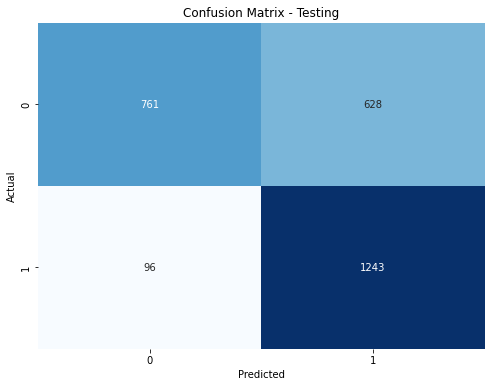

In [49]:
model_scores_classification(mlp2)

# created mlp2 - the scores are not too overfitted
# the score improved, but can stil be improved 

### 2nd iteration - higher layer sizes

In [50]:
param_grid = {'hidden_layer_sizes' : [(10,),(40,),(70,),(100,)], # lower layer sizes prevents overfitting as compared to higher sizes
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[30,40,50]} # try a lower set of iterations 

In [51]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.668 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.677 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.691 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.637 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.638 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.641 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.678 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.611 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.697 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.641 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.579 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.654 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.697 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.667 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.640 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.529 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.509 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.597 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.531 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.557 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.636 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.705 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.656 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.641 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.537 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.608 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.531 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.559 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.636 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.705 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.656 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.697 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.661 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.681 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.570 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.619 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.531 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.559 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.636 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.705 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.656 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.526 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.582 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.574 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.610 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.626 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.605 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.710 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.597 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.565 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.584 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.629 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.581 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.610 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.556 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.605 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.556 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.597 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.572 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.583 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.630 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.586 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.610 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.556 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.605 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.556 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.597 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.587 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.623 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.520 total time=   0.3s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.587 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.623 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.716 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.587 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.623 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.716 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.658 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.535 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.672 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.510 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.662 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.532 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.529 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.552 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.740 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.674 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.498 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.693 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.590 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.529 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.497 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.755 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.580 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.685 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.636 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.688 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.595 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.496 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.529 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.605 total time=   0.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.540 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.564 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.596 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.521 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.523 total time=   0.9s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.572 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.598 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.581 total time=   0.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.505 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.537 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.545 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.549 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.516 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.548 total time=   1.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.642 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.695 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.627 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.614 total time=   0.6s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.554 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.560 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.552 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.506 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.542 total time=   1.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.638 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.699 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.588 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.589 total time=   0.7s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.505 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.537 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.604 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.659 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.533 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.627 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.593 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.580 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.537 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.551 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.532 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.511 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.505 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.506 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.496 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.546 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.674 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.614 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.676 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.632 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.610 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.595 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.564 total time=   0.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.532 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.511 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.505 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.506 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.672 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.595 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.672 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.654 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.671 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.624 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.562 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.624 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.657 total time=   0.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.532 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.511 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.505 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.506 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.540 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.529 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.551 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.507 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.519 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.661 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.588 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.658 total time=   0.6s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.525 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.588 total time=   0.6s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.544 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.539 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.544 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.511 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.520 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.582 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.646 total time=   0.7s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.525 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.612 total time=   0.8s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.540 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.544 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.548 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.514 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.536 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.624 total time=   1.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.572 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.661 total time=   1.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.525 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.643 total time=   1.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.636 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.624 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.643 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.505 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.661 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.635 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.662 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.646 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.510 total time=   0.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.505 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.664 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.638 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.653 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.659 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.504 total time=   0.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.514 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.505 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.516 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.514 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.518 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.506 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.498 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.526 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.526 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.507 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.549 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.517 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.652 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.503 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.630 total time=   0.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.526 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.506 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.507 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.508 total time=   0.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.50

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.653 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.555 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.654 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.639 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.650 total time=   0.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.526 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.524 total time=   0.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.507 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.508 total time=   0.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.672 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.636 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.583 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.636 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.667 total time=   0.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.496 total time=   0.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.505 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.495 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.495 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.494 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.668 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.647 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.639 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.660 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.671 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.496 total time=   0.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.505 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.496 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.495 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.495 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.494 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.666 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.626 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.654 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.662 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.676 total time=   0.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.504 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.496 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.507 total time=   0.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.505 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.496 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.495 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.495 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.494 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.600 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.609 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.581 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.648 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.604 total time=   1.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.513 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.654 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.634 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.663 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.647 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.676 total time=   1.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.513 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.656 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.632 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.668 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.657 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.684 total time=   1.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.513 total time=   0.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.669 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.648 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.702 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.679 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.649 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.681 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.669 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.722 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.695 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.695 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.720 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.699 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.728 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.706 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.730 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.655 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.614 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.668 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.653 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=lbfgs;, score=0.660 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.614 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.600 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.743 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.540 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=adam;, score=0.601 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.659 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.614 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.678 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.673 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=lbfgs;, score=0.660 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.614 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.600 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.650 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.540 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=adam;, score=0.610 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.679 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.629 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.704 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.675 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=lbfgs;, score=0.681 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.614 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.600 total time=   0.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.670 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.540 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=adam;, score=0.619 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(40,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.579 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.584 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.606 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.530 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=lbfgs;, score=0.596 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.705 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.668 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.561 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.599 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=adam;, score=0.700 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.589 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.611 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.584 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=lbfgs;, score=0.612 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.723 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.668 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.625 total time=   0.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.599 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=adam;, score=0.700 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=40, solver=sgd;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.603 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.589 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.646 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.600 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=lbfgs;, score=0.617 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.723 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.668 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.625 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.599 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=adam;, score=0.700 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(70,), max_iter=50, solver=sgd;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.555 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.629 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.656 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.660 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=lbfgs;, score=0.659 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.703 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.654 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.685 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.688 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=adam;, score=0.577 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.623 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.617 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.664 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.655 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=lbfgs;, score=0.672 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.626 total time=   0.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.647 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.621 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.712 total time=   0.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=adam;, score=0.641 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=40, solver=sgd;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.616 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.617 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.674 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.656 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=lbfgs;, score=0.675 total time=   0.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.622 total time=   0.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.647 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.748 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.675 total time=   0.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=adam;, score=0.641 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=50, solver=sgd;

In [52]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7166896401804286
{'activation': 'relu', 'hidden_layer_sizes': (10,), 'max_iter': 50, 'solver': 'adam'}
Elapsed Time: 05:21


In [53]:
mlp3= MLPClassifier(activation = 'relu',
                     hidden_layer_sizes=(10,),
                     max_iter=50,
                     solver='adam',
                    random_state=42).fit(X_train,y_train)

Model: MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, random_state=42)

Training score: 0.6965744814582024
Testing score: 0.6799853372434017

Test Report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60      1389
           1       0.62      0.90      0.73      1339

    accuracy                           0.68      2728
   macro avg       0.72      0.68      0.67      2728
weighted avg       0.73      0.68      0.66      2728



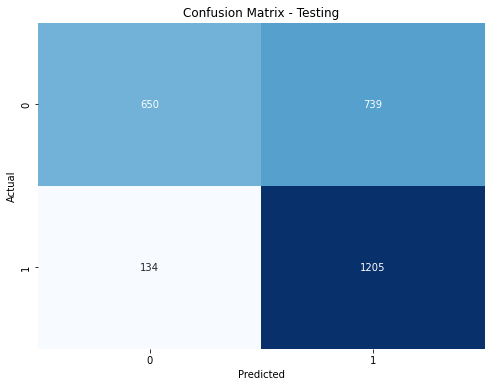

In [54]:
model_scores_classification(mlp3)

# scores went lower, and it is more overfit now 
# issue of overfitting does not exactly relate to layer sizes and iterations 

### 3rd iteration - higher max_iter, and higher layer sizes 
- deviating from our previous approach : we use more iterations and higher layer sizes to let the model learn better 

In [55]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,)], 
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[100,300,500]} 

In [56]:
start_time = time.time()

# grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.587 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.716 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.587 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.716 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.587 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.716 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   5.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   6.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   6.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   6.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.685 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.651 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.677 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.700 total time=   1.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.693 total time=   1.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.683 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.518 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.699 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.710 total time=   5.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.720 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.731 total time=   4.9s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.693 total time=   0.9s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.683 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.518 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.699 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.734 total time=   8.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.734 total time=   8.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.722 total time=   8.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.693 total time=   0.9s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.683 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.640 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.518 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.698 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.658 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.699 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.677 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.722 total time=   2.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.709 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.632 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.522 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.570 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.535 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.496 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.706 total time=  10.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.738 total time=  10.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.712 total time=  10.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.728 total time=   7.8s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.741 total time=   3.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.709 total time=   0.5s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.632 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.522 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.570 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.535 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.496 total time=   4.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.496 total time=   4.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.496 total time=   4.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.496 total time=   4.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.496 total time=   5.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.707 total time=  14.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.740 total time=  11.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.731 total time=  16.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.740 total time=  13.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.741 total time=   3.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.709 total time=   0.7s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.632 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.522 total time=   0.7s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.570 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.535 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=  10.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=  11.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=  11.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=  12.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=   7.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.669 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.549 total time=   2.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.678 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.657 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.676 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.692 total time=   1.8s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.572 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.736 total time=   1.8s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.525 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.731 total time=   1.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.725 total time=   8.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.702 total time=   8.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.771 total time=   9.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.727 total time=   8.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.759 total time=   7.8s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.756 total time=   2.9s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.572 total time=   0.7s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.751 total time=   4.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.525 total time=   0.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.731 total time=   2.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.6s
[CV 3/5] END activation=logistic, hidden_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.766 total time=  19.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.721 total time=  19.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.775 total time=  20.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.764 total time=  17.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.770 total time=  17.9s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.756 total time=   4.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.572 total time=   1.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.751 total time=   4.3s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.525 total time=   0.7s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.731 total time=   2.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.504 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.527 total time=   5.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.577 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.551 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.529 total time=   5.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.550 total time=   5.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.681 total time=   3.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.694 total time=   3.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.744 total time=   3.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.570 total time=   1.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.711 total time=   2.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.495 total time=   0.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.665 total time=  18.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.647 total time=  17.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.734 total time=  21.6s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.714 total time=  16.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.708 total time=  18.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.749 total time=   4.9s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.716 total time=   4.6s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.747 total time=   3.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.570 total time=   0.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.711 total time=   1.8s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.731 total time=  25.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.689 total time=  23.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.751 total time=  32.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.714 total time=  13.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.758 total time=  23.9s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.749 total time=   7.5s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.716 total time=   7.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.747 total time=   4.9s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.570 total time=   1.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.711 total time=   2.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   0.5s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.533 total time=   8.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.529 total time=   7.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.548 total time=   6.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.518 total time=   8.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.518 total time=   8.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.745 total time=   4.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.697 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.734 total time=   4.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.727 total time=   4.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.710 total time=   4.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.529 total time=   0.8s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.496 total time=   0.6s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.518 total time=   0.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.504 total time=   1.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.494 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.678 total time=  23.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.667 total time=  21.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.688 total time=  21.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.648 total time=  22.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.726 total time=  21.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.753 total time=   5.9s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.654 total time=   5.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.751 total time=   4.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.764 total time=   6.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.782 total time=   8.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.529 total time=   0.7s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.712 total time=  38.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.689 total time=  53.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.734 total time=  56.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.688 total time=  55.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.736 total time=  37.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.753 total time=   6.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.654 total time=   5.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.751 total time=   4.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.764 total time=   6.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.782 total time=   8.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.529 total time=   0.7s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.674 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.644 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.679 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.665 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.684 total time=   2.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.513 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.749 total time=   6.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.720 total time=   5.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.764 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.753 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.758 total time=   6.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.513 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.564 total time=   0.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.745 total time=   8.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.746 total time=   8.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.781 total time=   9.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.792 total time=   9.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.785 total time=   9.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.496 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.513 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.658 total time=   4.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.605 total time=   5.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.634 total time=   4.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.652 total time=   5.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.642 total time=   5.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.496 total time=   1.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.508 total time=   1.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.496 total time=   0.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.496 total time=   0.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.496 total time=   0.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=100, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.693 total time=  13.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.663 total time=  12.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.688 total time=  13.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.715 total time=  11.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.740 total time=  11.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.496 total time=   1.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.508 total time=   1.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.496 total time=   0.5s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.496 total time=   0.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.496 total time=   0.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=300, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.748 total time=  19.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.744 total time=  18.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.705 total time=  17.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.777 total time=  16.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.745 total time=  18.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.496 total time=   0.9s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.508 total time=   1.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.496 total time=   0.5s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.496 total time=   0.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.496 total time=   0.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=500, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.544 total time=   6.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.565 total time=   7.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.573 total time=   6.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.515 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.581 total time=   6.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.512 total time=   1.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.536 total time=   0.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.499 total time=   0.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.511 total time=   0.9s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.505 total time=   0.9s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.504 total time=   0.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.503 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=100, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.666 total time=  16.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.635 total time=  18.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.707 total time=  17.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.663 total time=  17.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.721 total time=  17.9s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.512 total time=   1.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.536 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.499 total time=   0.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.511 total time=   0.9s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.505 total time=   0.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.504 total time=   0.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.503 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=300, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.685 total time=  33.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.643 total time=  39.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.734 total time=  39.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.708 total time=  39.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.763 total time=  39.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.512 total time=   2.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.536 total time=   1.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.499 total time=   1.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.511 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.505 total time=   1.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.504 total time=   1.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.503 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=500, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.684 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.628 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.705 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.679 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=lbfgs;, score=0.687 total time=   2.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.622 total time=   1.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.647 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.748 total time=   1.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.675 total time=   1.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.641 total time=   0.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.701 total time=   8.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.660 total time=   7.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.710 total time=   8.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.706 total time=   8.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=lbfgs;, score=0.718 total time=   8.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.622 total time=   1.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.647 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.748 total time=   1.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.675 total time=   1.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.641 total time=   0.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=300, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.702 total time=  12.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.682 total time=  12.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.771 total time=  13.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.721 total time=  13.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=lbfgs;, score=0.743 total time=  13.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.622 total time=   1.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.647 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.748 total time=   1.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.675 total time=   1.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.641 total time=   0.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.504 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=500, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.675 total time=   5.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.619 total time=   5.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.669 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.649 total time=   5.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=lbfgs;, score=0.671 total time=   4.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.671 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.560 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.516 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.511 total time=   1.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.515 total time=   0.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=100, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.696 total time=  14.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.654 total time=  13.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.709 total time=  15.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.702 total time=  17.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=lbfgs;, score=0.689 total time=  14.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.671 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.560 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.516 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.511 total time=   1.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.515 total time=   0.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=300, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.701 total time=  23.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.654 total time=  13.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.716 total time=  24.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.697 total time=  28.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=lbfgs;, score=0.700 total time=  24.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.671 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.560 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.516 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.511 total time=   1.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.515 total time=   0.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.655 total time=   8.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.633 total time=   7.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.683 total time=   7.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.662 total time=   8.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=lbfgs;, score=0.662 total time=   8.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.631 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.672 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.530 total time=   1.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.529 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=adam;, score=0.527 total time=   1.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.504 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, solver=sgd;, score=0.504 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=100, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.685 total time=  24.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.687 total time=  22.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.712 total time=  22.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.685 total time=  23.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=lbfgs;, score=0.693 total time=  25.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.631 total time=   1.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.672 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.530 total time=   1.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.529 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=adam;, score=0.527 total time=   1.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.504 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, solver=sgd;, score=0.504 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=300, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.701 total time=  38.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.731 total time=  34.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.709 total time=  36.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.698 total time=  40.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=lbfgs;, score=0.726 total time=  41.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.631 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.672 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.530 total time=   1.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.529 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.527 total time=   1.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.504 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.504 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(300,), max_iter=500, so

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [57]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7696440834556117
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'lbfgs'}
Elapsed Time: 47:03


In [87]:
mlp4 = MLPClassifier(activation = 'tanh',
                     hidden_layer_sizes = (100,),
                     max_iter = 500,
                     solver='lbfgs',
                     random_state=42).fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: MLPClassifier(activation='tanh', max_iter=500, random_state=42, solver='lbfgs')

Training score: 0.7798554368321811
Testing score: 0.7738269794721407

Test Report:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1389
           1       0.70      0.95      0.80      1339

    accuracy                           0.77      2728
   macro avg       0.81      0.78      0.77      2728
weighted avg       0.81      0.77      0.77      2728



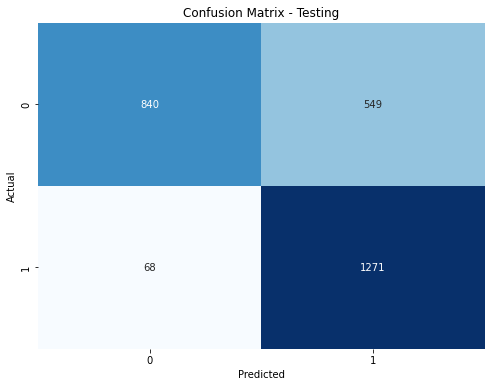

In [88]:
model_scores_classification(mlp4)

# model is not overfitted, train and test scores are close
# find ways to increase the score? 

### 4th iteration - add regularization 

In [108]:
mlp5 = MLPClassifier(activation = 'tanh',
                     hidden_layer_sizes = (100,),
                     max_iter = 500,
                     solver='lbfgs',
                     random_state=42).fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: MLPClassifier(activation='tanh', max_iter=500, random_state=42, solver='lbfgs')

Training score: 0.7798554368321811
Testing score: 0.7738269794721407

Test Report:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1389
           1       0.70      0.95      0.80      1339

    accuracy                           0.77      2728
   macro avg       0.81      0.78      0.77      2728
weighted avg       0.81      0.77      0.77      2728



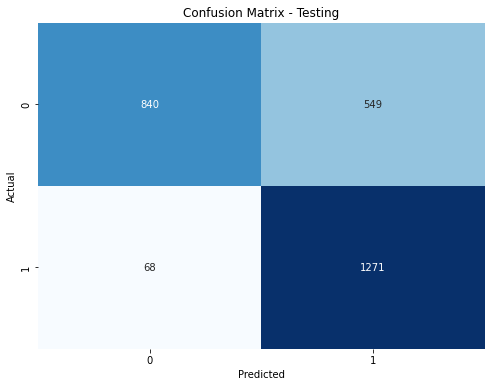

In [109]:
model_scores_classification(mlp5)

### K-folds Cross Validation 

In [110]:
results  = cross_validate(mlp5, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


train_score:  [0.74054723 0.78468307 0.7731647  0.77646412 0.78210063]
test_score:  [0.74656405 0.77899945 0.76457646 0.76237624 0.78547855]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

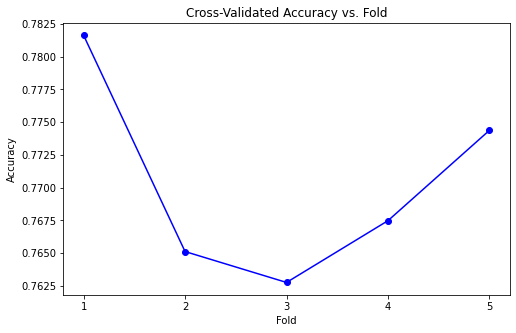

In [112]:
from sklearn.model_selection import KFold

# Assuming X_train and y_train are your training data
mlp5 = MLPClassifier(activation='tanh',
                     hidden_layer_sizes=(100,),
                     max_iter=500,
                     solver='lbfgs',
                     random_state=42)

# Define the number of folds for cross-validation
k_folds = 5  # You can adjust this value

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(mlp5, X_train, y_train, cv=kf)

# Plot the cross-validated accuracy
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, k_folds + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validated Accuracy vs. Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, k_folds + 1))
plt.show()

## 2. Airbnb

### 2.1 Load and Sample the data

In [2]:
df_bnb = pd.read_csv('./bnb_transformed.csv')

In [3]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         6307 non-null   int64  
 1   neighbourhood                   6307 non-null   int64  
 2   latitude                        6307 non-null   float64
 3   longitude                       6307 non-null   float64
 4   room_type                       6307 non-null   int64  
 5   price                           6307 non-null   float64
 6   minimum_nights                  6307 non-null   float64
 7   number_of_reviews               6307 non-null   float64
 8   reviews_per_month               6307 non-null   float64
 9   calculated_host_listings_count  6307 non-null   float64
 10  availability_365                6307 non-null   float64
 11  last_review_year                6307 non-null   float64
 12  last_review_month               63

In [4]:
df_bnb.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,cosy,cozy,mins,mrt,near,orchard,private,room,spacious,studio
0,227796,131,1.746376,-2.626110,1,81.0,1.729361,1.157713,0.217513,-0.684275,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,1.000000,0.0,0.0
1,1439258,469,-0.904317,-1.710715,1,44.0,1.084695,1.157713,0.137405,-0.226308,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.641676,0.0,0.0
2,1439258,469,-0.927419,-1.596939,1,40.0,1.406505,0.879358,-0.124190,-0.226308,...,0.0,0.0,0.720567,0.48444,0.0,0.0,0.0,0.496085,0.0,0.0
3,1521514,134,0.463587,-0.512277,1,65.0,-0.547453,1.647549,1.060556,-0.610410,...,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,1439258,469,-0.842913,-1.677979,1,44.0,1.406505,1.008257,-0.021196,-0.226308,...,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [5]:
df_bnb.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_year                  0
last_review_month                 0
last_review_day                   0
apartment                         0
apt                               0
bed                               0
bedroom                           0
br                                0
central                           0
city                              0
condo                             0
cosy                              0
cozy                              0
mins                              0
mrt                               0
near                              0
orchard                     

In [6]:
df_bnb.describe()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,cosy,cozy,mins,mrt,near,orchard,private,room,spacious,studio
count,6.307000e+03,6307.000000,6.307000e+03,6.307000e+03,6307.000000,6307.000000,6.307000e+03,6.307000e+03,6.307000e+03,6.307000e+03,...,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000
mean,9.268678e+07,581.983986,1.344935e-14,4.870975e-13,1.537498,156.268432,-2.632603e-15,2.269354e-14,-2.547581e-15,1.496750e-15,...,0.038088,0.038503,0.034565,0.105723,0.085033,0.044024,0.045422,0.119620,0.051807,0.067715
std,8.377692e+07,327.440241,1.000079e+00,1.000079e+00,0.599170,98.686740,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,...,0.161810,0.159995,0.150851,0.232204,0.214786,0.170141,0.178046,0.275969,0.181525,0.215714
min,2.366600e+04,101.000000,-3.632829e+00,-3.501983e+00,0.000000,35.000000,-1.236524e+00,-1.132311e+00,-1.180403e+00,-6.842753e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.114972e+07,362.000000,-7.690466e-01,-4.677651e-01,1.000000,81.000000,-5.474529e-01,-1.132311e+00,-1.180403e+00,-6.547290e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.344891e+07,477.000000,1.444091e-01,-6.675572e-02,2.000000,135.000000,-1.463868e-01,-1.756958e-02,6.399646e-02,-4.922244e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.598048e+08,994.000000,6.596528e-01,4.478298e-01,2.000000,208.000000,8.409538e-01,9.270265e-01,8.235087e-01,2.907525e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.885676e+08,1043.000000,3.781817e+00,2.683822e+00,2.000000,394.000000,1.729361e+00,1.647549e+00,1.733648e+00,3.348795e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.1.1 Train and Test Splits 

In [7]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.2 Build the Model(s)

In [9]:
models = []

model_names = []

### Linear Regression

In [10]:
lr = LinearRegression().fit(X_train,y_train)

models.append(lr)
model_names.append('LinearRegression')

### Decision Tree Regressor

In [11]:
dtr = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

models.append(dtr)
model_names.append('DTree Regressor')

### Random Forest Regressor

In [12]:
rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)

models.append(rfr)
model_names.append('Random Forest Regressor')

### SVR 

In [13]:
svr = SVR().fit(X_train, y_train)

models.append(svr)
model_names.append('SVR')

### ADA Boost

In [14]:
ada_r = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

models.append(ada_r)
model_names.append('ADA Boost')

### XGB

In [15]:
xgb_r = XGBRegressor(random_state=42).fit(X_train, y_train)

models.append(xgb_r)
model_names.append('XG Boost')

### MLP Regressor 

In [16]:
mlp_r = MLPRegressor(random_state=42).fit(X_train,y_train)

models.append(mlp_r)
model_names.append('Multilayer Perceptron')

### 2.3 Evaluate and Improve the Model(s)

In [17]:
def model_scores_regression(model):
    print(f"Model : {model}:\n")
    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on the testing set
    y_test_pred = model.predict(X_test)
    
    # Calculated the RMSE and R^2 for training set
    print(model.score(X_train, y_train), '(Train R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    print(model.score(X_test, y_test), '(Test R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    
    # Create subplot for training set
    plt.figure(figsize=(12, 5))  # Adjust the figure size
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Actual vs. Predicted (Training)')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Training Set: Fitted against Predicted Plot")
    plt.legend()

    # Calculated the RMSE and R^2 for testing set
    print(sqrt(mean_squared_error(y_train_pred, y_train)), '(Train RMSE)')  # RMSE: the lower the better
    print(sqrt(mean_squared_error(y_test_pred, y_test)), '(Test RMSE)')  # RMSE: the lower the better
    
    # Create subplot for testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, label='Actual vs. Predicted (Testing)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Testing Set: Fitted against Predicted Plot")
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

### 2.3.1 Consolidated View of Model Accuracies 

In [18]:
results = []

for model, model_name in zip(models, model_names):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Calculate metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,LinearRegression,71.099482,75.212243,0.468874,0.447390
1,DTree Regressor,0.000000,80.962110,1.000000,0.359667
2,Random Forest Regressor,21.646311,60.106197,0.950770,0.647077
3,SVR,98.446313,102.872343,-0.018271,-0.033806
4,ADA Boost,78.968380,82.636932,0.344804,0.332901
5,XG Boost,22.143548,60.374975,0.948482,0.643913
6,Multilayer Perceptron,11277.821221,10667.088878,-13362.338953,-11114.621609


### 2.3.2 Choosing Models 
These models will be chosen for further evaluation : <mark>model1</mark>, <mark>model2</mark>,<mark>model3</mark>.

### 2.3.2.1 utilizing statsmodels 

In [ ]:
lm2 = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
lm2.summary()